# Final Project - SUPPORT2 Dataset
**Name: Xinxin Zhou**

**Github Link: https://github.com/NoraZhouXX/1030-Final-Project-SUPPORT2**

# EDA & Visualization & Data Cleaning

In this project, I want to build an interpretable, clinically valid supervised ML model that predicts in-hospital mortality for critically ill patients in the SUPPORT2 dataset using day-3 demographic, diagnostic, physiologic, and lab features with robust handling of missingness and non-IID structure.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.base import clone


In [2]:
df = pd.read_csv("/Users/norazhou/Desktop/DATA1030/Project/Final_project/data/support2.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Index     9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

,Index,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,...,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,4553.000000,62.650823,0.681054,0.259198,17.863042,478.449863,1.868644,11.747691,12.058546,5.999579e+04,...,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,2628.531434,15.593710,0.466094,0.438219,22.006440,560.383272,1.344409,3.447743,24.636694,1.026488e+05,...,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,1.000000,18.041990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.169000e+03,...,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2277.000000,52.797000,0.000000,0.000000,6.000000,26.000000,1.000000,10.000000,0.000000,9.740000e+03,...,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,4553.000000,64.856990,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.502400e+04,...,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,6829.000000,73.998960,1.000000,1.000000,20.000000,761.000000,3.000000,14.000000,9.000000,6.459800e+04,...,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,9105.000000,101.847960,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,...,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


In [3]:
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of Rows:  9105
Number of Columns:  48


# Visualizations

Text(0.5, 1.0, 'Top 15 Features by Missingness')

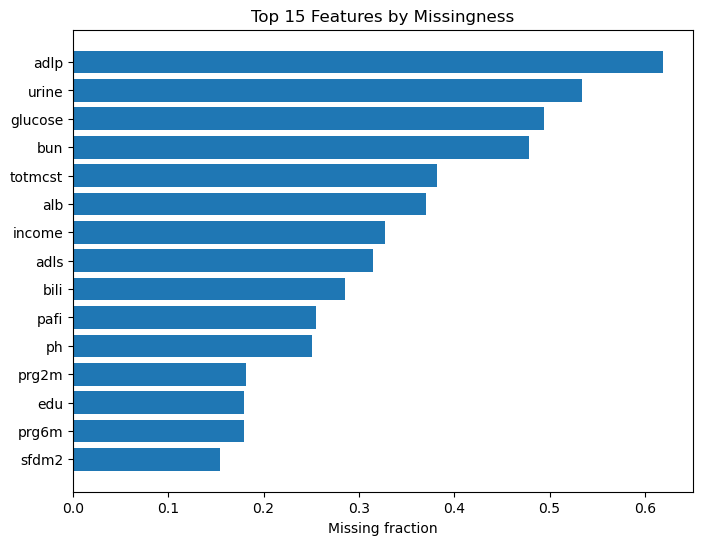

In [4]:
# Missing Values (Top 15)
miss_frac_all = df.isna().mean().sort_values(ascending=False)
top = miss_frac_all.head(15)

plt.figure(figsize=(8, 6))
plt.barh(top.index, top.values)
plt.gca().invert_yaxis()
plt.xlabel("Missing fraction")
plt.title("Top 15 Features by Missingness")

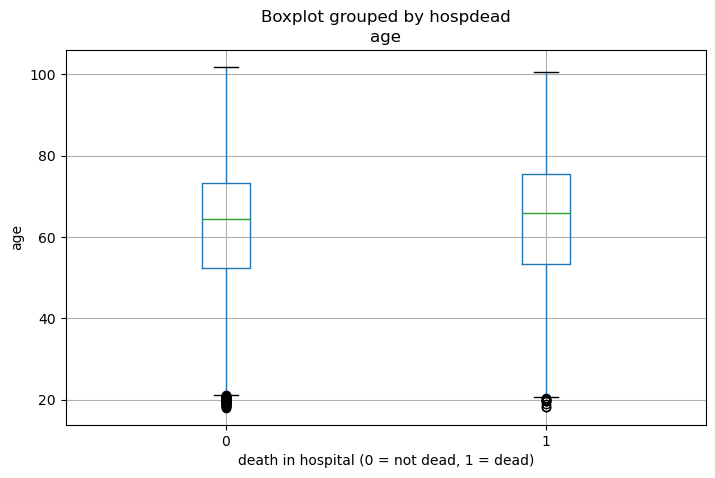

In [5]:
# Age vs In-Hospital Death
df[['age','hospdead']].boxplot(by='hospdead',figsize=(8,5)) 
plt.xlabel('death in hospital (0 = not dead, 1 = dead)')
plt.ylabel('age')
plt.show()

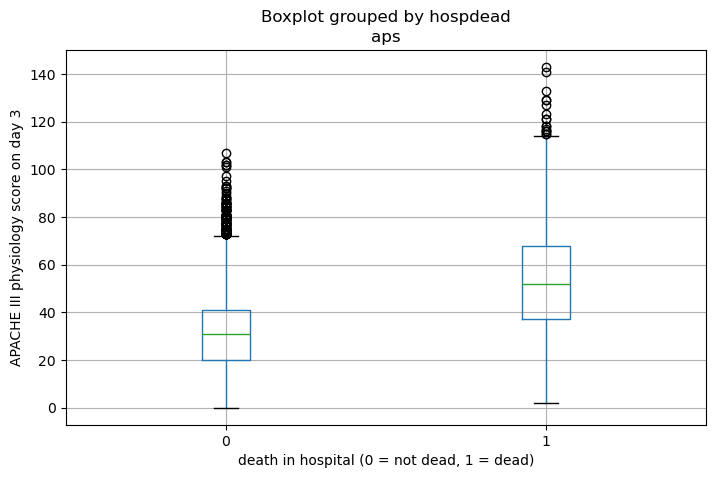

In [6]:
# APS vs In-Hospital Death ()
df[['aps','hospdead']].boxplot(by='hospdead',figsize=(8,5)) 
plt.xlabel('death in hospital (0 = not dead, 1 = dead)')
plt.ylabel('APACHE III physiology score on day 3')
plt.show()

hospdead       0    1
income               
$11-$25k    1166  361
$25-$50k     814  243
>$50k        526  158
under $11k  2152  703
hospdead           0         1
income                        
$11-$25k    0.763589  0.236411
$25-$50k    0.770104  0.229896
>$50k       0.769006  0.230994
under $11k  0.753765  0.246235


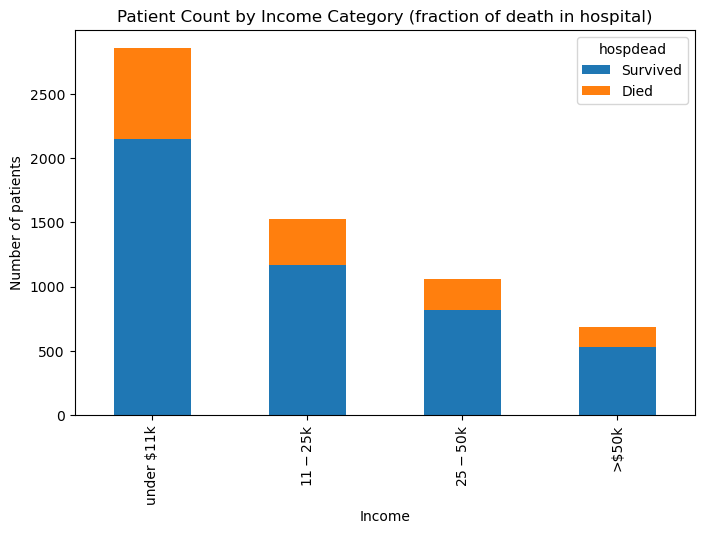

In [7]:
# Patient Count by Income Category
count_matrix = df.groupby(['income', 'hospdead']).size().unstack(fill_value=0)
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0) 
print(count_matrix_norm)

order = ["under $11k","$11-$25k","$25-$50k",">$50k"]
count_matrix = count_matrix.reindex(order)

count_matrix.plot(kind='bar', stacked=True, figsize=(8,5))
plt.ylabel('Number of patients')
plt.xlabel('Income')
plt.title('Patient Count by Income Category (fraction of death in hospital)')
plt.legend(title='hospdead', labels=['Survived','Died'], loc='upper right')
plt.show()

hospdead               0     1
dzclass                       
ARF/MOSF            2668  1559
COPD/CHF/Cirrhosis  2554   308
Cancer              1289   131
Coma                 234   362
hospdead                   0         1
dzclass                               
ARF/MOSF            0.631181  0.368819
COPD/CHF/Cirrhosis  0.892383  0.107617
Cancer              0.907746  0.092254
Coma                0.392617  0.607383


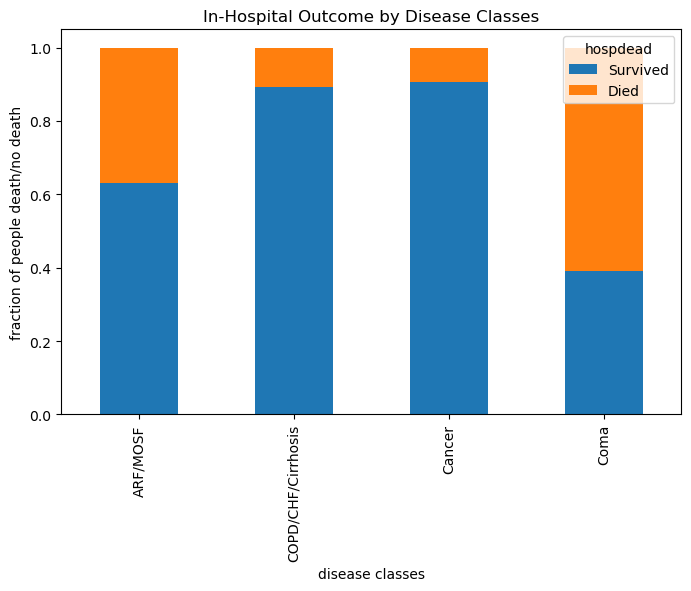

In [8]:
# Disease Class vs Death
count_matrix = df.groupby(['dzclass', 'hospdead']).size().unstack() 
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0) 
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(8,5)) 
plt.ylabel('fraction of people death/no death')
plt.xlabel('disease classes')
plt.title('In-Hospital Outcome by Disease Classes')
plt.legend(title='hospdead', labels=['Survived','Died'], loc='upper right')
plt.show()

hospdead       0     1
ca                    
metastatic  1531   327
no          4432  1563
yes          782   470
hospdead           0         1
ca                            
metastatic  0.824004  0.175996
no          0.739283  0.260717
yes         0.624601  0.375399


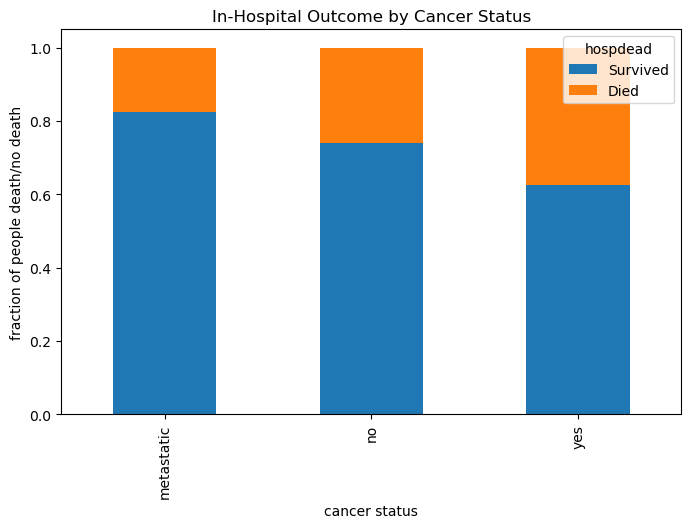

In [9]:
# In-Hospital Outcome by Cancer Status
count_matrix = df.groupby(['ca', 'hospdead']).size().unstack() 
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0) 
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(8,5)) 
plt.ylabel('fraction of people death/no death')
plt.xlabel('cancer status')
plt.title('In-Hospital Outcome by Cancer Status')
plt.legend(title='hospdead', labels=['Survived','Died'], loc='upper right')
plt.show()

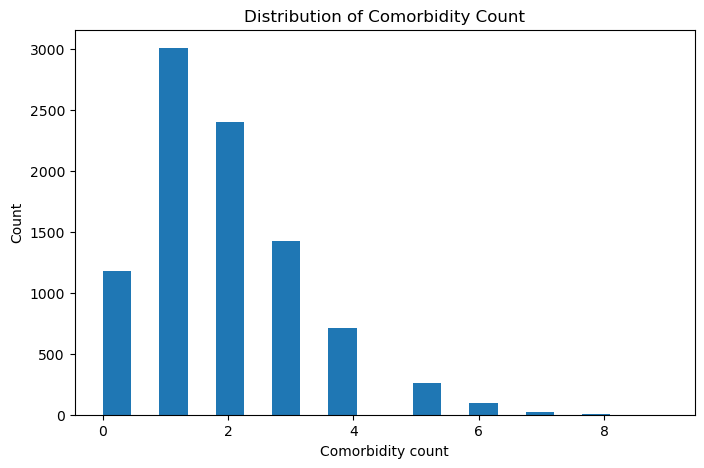

In [10]:
plt.figure(figsize=(8,5))
df["num.co"].plot.hist(bins = 20)
plt.xlabel("Comorbidity count")
plt.ylabel("Count")
plt.title("Distribution of Comorbidity Count")
plt.show()

# Data Cleaning

In [ ]:
# I excluded features with more than 50% missing values to avoid 
# imputation-driven noise and keep the pipeline simple and robust.
# I also removed post-outcome and downstream variables 
# (e.g., charges, LOS, modelled survival) to prevent information 
# leakage and preserve clinical validity.

target = "hospdead"
y = df[target].astype(int)

drop_cols = [
    "Index", "charges", "totcst", "totmcst",
    "slos", "d.time", "surv2m", "surv6m", "sfdm2",
    "prg2m", "prg6m", "avtisst", "dnrday", "edu",
    "hday", "death"
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

continuous_ftrs = [
    "age", "num.co", "scoma", "sps", "aps",
    "meanbp", "wblc", "hrt", "resp", "temp",
    "pafi", "alb", "bili", "crea", "sod", "ph",
    "glucose", "bun", "urine", "adlsc"
]

categorical_ftrs = [
    "sex", "dzgroup", "dzclass",
    "race", "diabetes", "dementia", "dnr"
]

# ordinal(string)
ordinal_str_ftrs = ["income", "ca"]

# ordinal(num)
ordinal_num_ftrs = ["adls", "adlp"]

# 最终用于建模的列
model_cols = continuous_ftrs + categorical_ftrs + ordinal_str_ftrs + ordinal_num_ftrs

# 用这些列构造 X
X = df[model_cols].copy()

print("X shape:", X.shape)
print("y positive rate:", y.mean())

X shape: (9105, 31)
y positive rate: 0.2591982427237781


In [12]:
# 连续特征的缺失率
cont_missing = X[continuous_ftrs].isna().mean().sort_values(ascending=False)
print("Missing fraction in continuous features:")
print(cont_missing)

cont_with_na = [c for c in continuous_ftrs if X[c].isna().any()]
cont_no_na   = [c for c in continuous_ftrs if not X[c].isna().any()]

print("Continuous WITH NA:", cont_with_na)
print("Continuous WITHOUT NA (kept for reduced‑features models):", cont_no_na)


Missing fraction in continuous features:
urine      0.533992
glucose    0.494234
bun        0.477979
alb        0.370346
bili       0.285667
pafi       0.255354
ph         0.250851
wblc       0.023284
crea       0.007359
hrt        0.000110
meanbp     0.000110
temp       0.000110
aps        0.000110
sps        0.000110
scoma      0.000110
sod        0.000110
resp       0.000110
age        0.000000
num.co     0.000000
adlsc      0.000000
dtype: float64
Continuous WITH NA: ['scoma', 'sps', 'aps', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine']
Continuous WITHOUT NA (kept for reduced‑features models): ['age', 'num.co', 'adlsc']


# Data Preprocessing

In [15]:
# Categorical: impute + OneHot Encoder
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot",  OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

# Ordinal: impute + Ordinal Encoder
ordinal_str_cats = [
    ["under $11k", "$11-$25k", "$25-$50k", ">$50k", "missing"],
    ["no", "yes", "metastatic", "missing"]
]
ordinal_str_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("ordinal", OrdinalEncoder(categories=ordinal_str_cats))
])

ordinal_num_cats = [
    [0,1,2,3,4,5,6,7,8],  # 8 represents missing
    [0,1,2,3,4,5,6,7,8]
]
ordinal_num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=8)),
    ("ordinal", OrdinalEncoder(categories=ordinal_num_cats))
])

from sklearn.preprocessing import StandardScaler

# continuous
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

preprocessor_reduced = ColumnTransformer(
    transformers=[
        ("cat",      categorical_transformer, categorical_ftrs),
        ("ord_str",  ordinal_str_transformer, ordinal_str_ftrs),
        ("ord_num",  ordinal_num_transformer, ordinal_num_ftrs),
        ("num",      numeric_transformer,     continuous_ftrs),
    ],
    remainder="drop"
)


# Model Training

In [16]:
import numpy as np
import pandas as pd
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

# ---------------------------
# 核心：对每个 missingness pattern 训练一个子模型
# ---------------------------

def pattern_reduced_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    """
    给定一个 base model(比如 LogisticRegression / LinearSVC / RandomForestClassifier),
    在每个 continuous missingness pattern 上单独训练模型，并对 X_test 做预测。
    返回：一个与 y_test 对齐的 pd.Series 概率/score(可能含 NaN,外面算 AUC 时要 mask 掉）。
    """

    # 1) 编码 + 标准化（fit on train）
    X_train_enc = pd.DataFrame(
        preprocessor_reduced.fit_transform(X_train),
        index=X_train.index
    )
    X_val_enc = pd.DataFrame(
        preprocessor_reduced.transform(X_val),
        index=X_val.index
    )
    X_test_enc = pd.DataFrame(
        preprocessor_reduced.transform(X_test),
        index=X_test.index
    )

    # 连续特征列在最后 len(continuous_ftrs) 个位置
    cont_start = X_train_enc.shape[1] - len(continuous_ftrs)
    cont_cols  = list(X_train_enc.columns[cont_start:])

    # 2) 在 test 上根据连续特征的缺失情况分 pattern
    mask = X_test_enc[cont_cols].isna()
    patterns = np.unique(mask.to_numpy(), axis=0)

    out_pred = pd.Series(index=y_test.index, dtype=float)

    for pattern in patterns:
        # 该 pattern 在 test 中的行
        pattern_rows = mask.apply(lambda row: np.array_equal(row.values, pattern), axis=1)
        if not pattern_rows.any():
            continue

        X_test_sub = X_test_enc.loc[pattern_rows]
        y_test_sub = y_test.loc[pattern_rows]

        # 这一 pattern 下，哪些 continuous 列是“非缺失”的 -> 保留
        cont_cols_to_keep = [c for c, keep in zip(cont_cols, ~pattern) if keep]
        usable_cols = list(X_train_enc.columns[:cont_start]) + cont_cols_to_keep

        # 训练集 / 验证集中，把含 NaN 的行丢掉（reduced-features）
        X_train_sub = X_train_enc[usable_cols].dropna()
        y_train_sub = y_train.loc[X_train_sub.index]

        X_val_sub = X_val_enc[usable_cols].dropna()
        y_val_sub = y_val.loc[X_val_sub.index]

        if (len(X_train_sub) == 0) or (len(X_test_sub) == 0):
            continue

        # 对这个 pattern 训练一个子模型
        mdl = clone(model).fit(X_train_sub, y_train_sub)

        if hasattr(mdl, "predict_proba"):
            pred = mdl.predict_proba(X_test_sub[usable_cols])[:, 1]
        else:
            # LinearSVC 用 decision_function
            pred = mdl.decision_function(X_test_sub[usable_cols])

        out_pred.loc[X_test_sub.index] = pred

    return out_pred

# 封装成三个算法的调用接口，方便在 loop 里用
def run_LR(params, X_train, y_train, X_val, y_val, X_test, y_test):
    mdl = LogisticRegression(max_iter=3000, solver="liblinear", **params)
    return pattern_reduced_model(mdl, X_train, y_train, X_val, y_val, X_test, y_test)

def run_SVM(params, X_train, y_train, X_val, y_val, X_test, y_test):
    mdl = LinearSVC(**params)
    return pattern_reduced_model(mdl, X_train, y_train, X_val, y_val, X_test, y_test)

def run_RF(params, X_train, y_train, X_val, y_val, X_test, y_test):
    mdl = RandomForestClassifier(random_state=0, n_jobs=-1, **params)
    return pattern_reduced_model(mdl, X_train, y_train, X_val, y_val, X_test, y_test)


In [20]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from itertools import product
from xgboost import XGBClassifier

# 模型名字列表（方便后面循环）
pattern_models = ["LR", "SVM", "RF"]

param_grids = {
    "LR": {
        "C": [0.1, 1.0, 10.0],
    },
    "SVM": {
        "C": [0.1, 1.0, 10.0],
    },
    "RF": {
        'max_depth': [1, 3, 10, 30, 100],
        'max_features': [0.5, 0.75, 1.0],
    },
    "XGB": {
        "learning_rate":   [0.03],
        "n_estimators":    [300, 700],
        "max_depth":       [3, 5],
        "reg_alpha":       [0.0, 0.01],
        "reg_lambda":      [1.0, 10.0],
        "subsample":       [0.66, 1.0],
        "colsample_bytree":[0.8, 1.0],
    },
}


In [21]:
def tune_pattern_model(model_name, param_grid,
                       X_train, y_train, X_val, y_val, X_test, y_test):
    """
    手动 grid-search:
    - 对每组超参数，在 (train, val) 上跑一遍 pattern_reduced_model;
    - 用 val AUC 选最好的；
    - 再用同一组超参在 test 上算一次 AUC。
    """
    # 如果没有超参要调（param_grid 为空 dict），就直接用默认模型
    if not param_grid:
        params = {}
        if model_name == "LR":
            pred_test = run_LR(params, X_train, y_train, X_val, y_val, X_test, y_test)
        elif model_name == "SVM":
            pred_test = run_SVM(params, X_train, y_train, X_val, y_val, X_test, y_test)
        elif model_name == "RF":
            pred_test = run_RF(params, X_train, y_train, X_val, y_val, X_test, y_test)
        mask = ~pred_test.isna()
        test_auc = roc_auc_score(y_test[mask], pred_test[mask])
        return params, test_auc

    best_params = None
    best_val_auc = -np.inf
    best_test_pred = None

    keys = list(param_grid.keys())
    for values in product(*param_grid.values()):
        params = dict(zip(keys, values))

        if model_name == "LR":
            pred_val = run_LR(params, X_train, y_train, X_val, y_val, X_val, y_val)
        elif model_name == "SVM":
            pred_val = run_SVM(params, X_train, y_train, X_val, y_val, X_val, y_val)
        elif model_name == "RF":
            pred_val = run_RF(params, X_train, y_train, X_val, y_val, X_val, y_val)
        else:
            raise ValueError(f"Unknown model: {model_name}")

        mask_val = ~pred_val.isna()
        val_auc = roc_auc_score(y_val[mask_val], pred_val[mask_val])

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            best_params = params

            # 同一组参数，在 test 上做一遍预测
            if model_name == "LR":
                best_test_pred = run_LR(params, X_train, y_train, X_val, y_val, X_test, y_test)
            elif model_name == "SVM":
                best_test_pred = run_SVM(params, X_train, y_train, X_val, y_val, X_test, y_test)
            elif model_name == "RF":
                best_test_pred = run_RF(params, X_train, y_train, X_val, y_val, X_test, y_test)

    mask_test = ~best_test_pred.isna()
    test_auc = roc_auc_score(y_test[mask_test], best_test_pred[mask_test])
    return best_params, test_auc


In [22]:
from collections import defaultdict

results = defaultdict(list)

seeds = range(5)   # 你可以改成 range(10) 做 10 个 random state

for rs in seeds:
    print(f"\n=========================")
    print(f" Random State = {rs}")
    print(f"=========================")

    # 1) 先像学长一样，拆成 other / test
    X_other, X_test, y_other, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=rs,
        stratify=y
    )

    # 再把 other 拆成 train / val（pattern 模型需要）
    X_train, X_val, y_train, y_val = train_test_split(
        X_other, y_other,
        test_size=0.25,   # -> 0.6 train, 0.2 val, 0.2 test
        random_state=rs,
        stratify=y_other
    )

    # ------------------------------------------------
    # 先跑三个 pattern-based 模型：LR / SVM / RF
    # ------------------------------------------------
    for model_name in ["LR", "SVM", "RF"]:
        print(f"\nTuning {model_name} (pattern-reduced)...")

        best_params, test_auc = tune_pattern_model(
            model_name,
            param_grids[model_name],
            X_train, y_train,
            X_val,   y_val,
            X_test,  y_test
        )

        print(f"Best params for {model_name}: {best_params}")
        print(f"Test AUC for {model_name}: {test_auc:.4f}")

        results[model_name].append({
            "random_state": rs,
            "best_params":  best_params,
            "test_auc":     test_auc
        })

    # ------------------------------------------------
    # 然后跑 XGBoost：像学长一样用 KFold + GridSearchCV
    # ------------------------------------------------
    print("\nTuning XGBoost with GridSearchCV...")

    # 注意：XGBoost 不用 pattern-reduced，直接让树模型自己处理 NaN
    # 只要我们用同一个 preprocessor_reduced 编码/标准化即可
    X_other_enc = preprocessor_reduced.fit_transform(X_other)
    X_test_enc  = preprocessor_reduced.transform(X_test)

    xgb_base = XGBClassifier(
        tree_method="hist",
        eval_metric="logloss",
        missing=np.nan,
        n_jobs=-1,
        random_state=rs,
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=rs)

    grid_search = GridSearchCV(
        estimator=xgb_base,
        param_grid=param_grids["XGB"],
        cv=kf,
        scoring="roc_auc",
        return_train_score=True,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_other_enc, y_other)

    best_xgb      = grid_search.best_estimator_
    best_xgb_params = grid_search.best_params_

    y_test_pred_xgb = best_xgb.predict_proba(X_test_enc)[:, 1]
    test_auc_xgb    = roc_auc_score(y_test, y_test_pred_xgb)

    print(f"Best parameters for XGB: {best_xgb_params}")
    print(f"Test AUC for XGB: {test_auc_xgb:.4f}")

    results["XGB"].append({
        "random_state": rs,
        "best_params":  best_xgb_params,
        "test_auc":     test_auc_xgb
    })

# ------------------------------------------------
# 最后打印所有模型的 mean ± std AUC
# ------------------------------------------------
print("\n=========== FINAL RESULTS (mean ± std AUC) ===========")
for model_name, model_results in results.items():
    aucs = np.array([r["test_auc"] for r in model_results])
    print(f"{model_name:4s}: {aucs.mean():.4f} ± {aucs.std():.4f}")



 Random State = 0

Tuning LR (pattern-reduced)...
Best params for LR: {'C': 0.1}
Test AUC for LR: 0.9281

Tuning SVM (pattern-reduced)...
Best params for SVM: {'C': 0.1}
Test AUC for SVM: 0.9261

Tuning RF (pattern-reduced)...
Best params for RF: {'max_depth': 30, 'max_features': 0.5}
Test AUC for RF: 0.9232

Tuning XGBoost with GridSearchCV...
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters for XGB: {'colsample_bytree': 1.0, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0.0, 'reg_lambda': 10.0, 'subsample': 1.0}
Test AUC for XGB: 0.9312

 Random State = 1

Tuning LR (pattern-reduced)...
Best params for LR: {'C': 0.1}
Test AUC for LR: 0.9128

Tuning SVM (pattern-reduced)...
Best params for SVM: {'C': 0.1}
Test AUC for SVM: 0.9143

Tuning RF (pattern-reduced)...
Best params for RF: {'max_depth': 10, 'max_features': 0.5}
Test AUC for RF: 0.9074

Tuning XGBoost with GridSearchCV...
Fitting 5 folds for each of 64 candidates, totalli